<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/13_dimentionality_reduction/dimensionality_reduction_class_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Class 1 - PCA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J

Downloading...
From: https://drive.google.com/uc?id=1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J
To: /content/mnist_train.csv
100% 76.8M/76.8M [00:01<00:00, 43.0MB/s]


In [3]:
d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


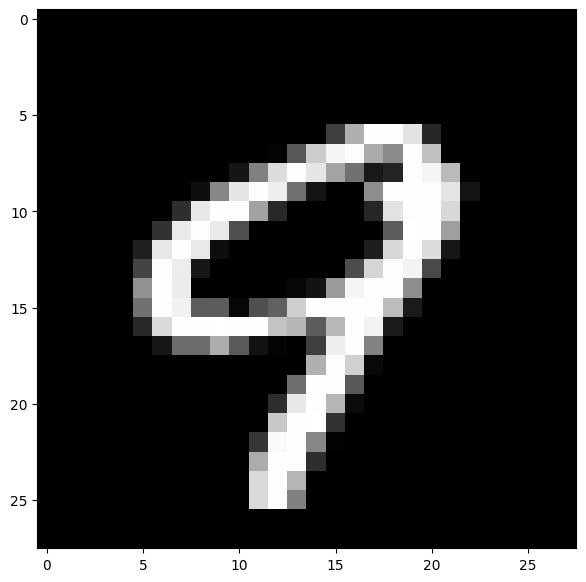

9


In [5]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].values.reshape(28, 28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [6]:
from sklearn.decomposition import PCA

In [7]:
from sklearn import datasets

digits = datasets.load_digits()

X=digits.data
print(X.shape)

(1797, 64)


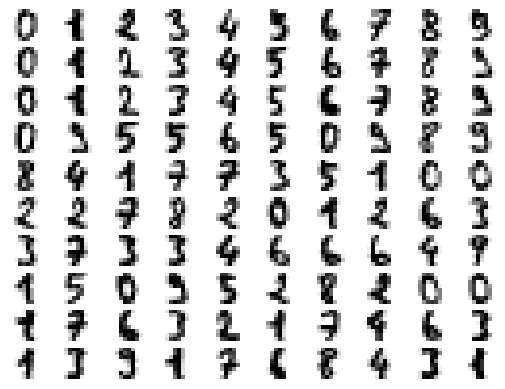

In [8]:
import matplotlib.pyplot as plt

plt.set_cmap('binary') # set the colourmap to grayscale white to black

for i in range(10):
  for j in range(10):
   ax = plt.subplot(10,10,1+10*i+j)
   ax.axis('off')
   ax.matshow(digits.images[10*i+j])

plt.show()
plt.close()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_stand = scaler.transform(X)

In [10]:
pca = PCA(n_components = 2)

X_embedded = pca.fit_transform(X_stand)

print(X_embedded.shape)

(1797, 2)


<Figure size 640x480 with 0 Axes>

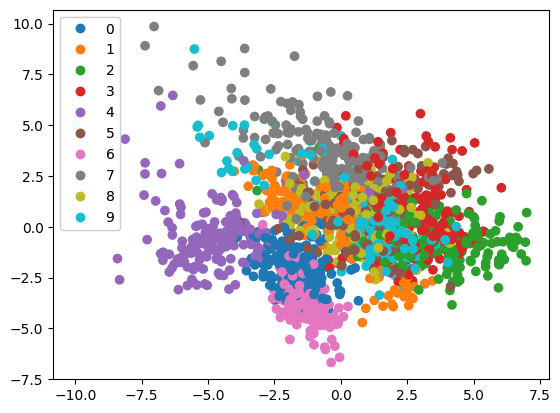

In [11]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

In [12]:
pca.components_

array([[-0.        ,  0.18223392,  0.285868  ,  0.22036967, -0.02516956,
        -0.00949725, -0.0524765 , -0.06269499,  0.03470727,  0.24553368,
         0.22915174, -0.10794381,  0.03620209,  0.03871159, -0.08378077,
        -0.09277502,  0.01669934,  0.1367165 , -0.06305075, -0.12287927,
         0.14819348, -0.02348425, -0.1711997 , -0.10420837, -0.00394882,
        -0.1163897 , -0.18820473,  0.0658604 ,  0.14353257, -0.12820705,
        -0.18062075, -0.05270917, -0.        , -0.23890251, -0.23500613,
        -0.00509137, -0.01310881, -0.15911618, -0.12939416, -0.        ,
        -0.05559906, -0.18715707, -0.15353371, -0.04682572, -0.11089272,
        -0.10720947,  0.01792652, -0.00227271, -0.02881729,  0.040868  ,
         0.11027068,  0.0318244 , -0.07904945,  0.06832147,  0.12124707,
         0.04877119, -0.00183586,  0.16039569,  0.27985301,  0.19444929,
         0.01777381,  0.103198  ,  0.1198106 ,  0.07149362],
       [ 0.        ,  0.04702701,  0.0595648 , -0.02080385,  0.

# **Class - 2 tSNE**

In [13]:
from sklearn.manifold import TSNE


X_embedded = TSNE().fit_transform(X)

<Figure size 640x480 with 0 Axes>

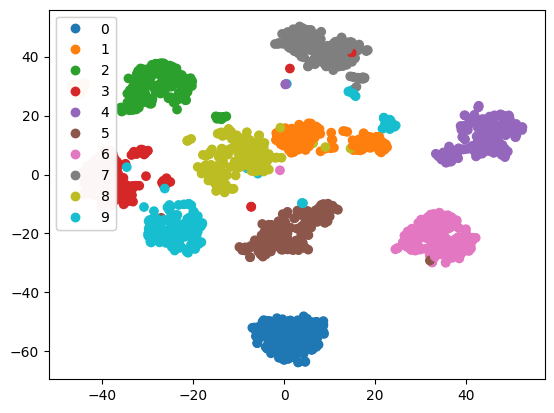

In [14]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

# **Class - 3 UMAP**

In [17]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


In [18]:
import umap
X_embedded = umap.UMAP().fit_transform(X)

print(X_embedded.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(1797, 2)


<Figure size 640x480 with 0 Axes>

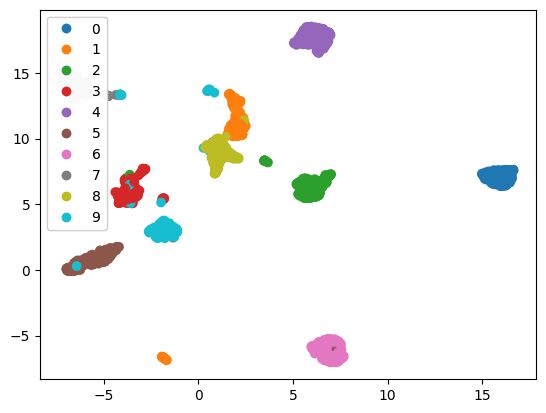

In [19]:
plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded[:,0],X_embedded[:,1],c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()